# Py-ART I/O in detail

One of Py-ART most useful features is the ability to read in radar data from a number of formats.  
As of version 1.5.0, Py-ART has full support for reading the following formats:

* NetCDF files formatted to meet the [CfRadial](http://www.ral.ucar.edu/projects/titan/docs/radial_formats/cfradial.html) conventions.

* Sigmet/IRIS, for example raw files from the ARM [XSAPR](http://www.arm.gov/instruments/xsapr) radars.

* MDV, for example raw files from the ARM [CSAPR](http://www.arm.gov/instruments/csapr) radars.

* Universal Format (UF) files.

* NEXRAD level 2 and 3 files available from [NCDC](http://www.ncdc.noaa.gov/).

* NEXRAD level 2 files converted using [Unidata's NetCDF-Java library](http://www.unidata.ucar.edu/software/thredds/current/netcdf-java/).

* Files from the [CSU-CHILL](http://www.chill.colostate.edu/w/CSU_CHILL) radar. 

* Any format supported by [NASA's TRMM RSL](http://trmm-fc.gsfc.nasa.gov/trmm_gv/software/rsl/) library.


Additionally Py-ART has partial support for reading the following formats:

* HDF5 files following the WMO's ODIM_H5 standard.
* HDF5 produced by GAMIC radars.
* NetCDF files from:
    * [ARM's KAZR instruments](http://www.arm.gov/instruments/kazr), a zenith pointing radar.
    * EDGE software.
    * NASA's D3R radar during GCPEx.
    * NSSL's NOXP radar during IPHEX.

* Any format supported by or [RadX](http://www.ral.ucar.edu/projects/titan/docs/radial_formats/radx.html).



Py-ART is continually being improved with support to read in additional format.  If your favorite format is missing, talk to us, we might be able to help you add support for it.

---
Import matplotlib and Py-ART

In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12.0, 9.0]
import pyart

## Basic reading of radar files in Py-ART

Lets read in some radar files.  First an MDV file from an ARM XSAPR radar in the Southern Great Plains

In [2]:
radar = pyart.io.read_mdv('data/110635.mdv')

Plotting the reflectivity data.

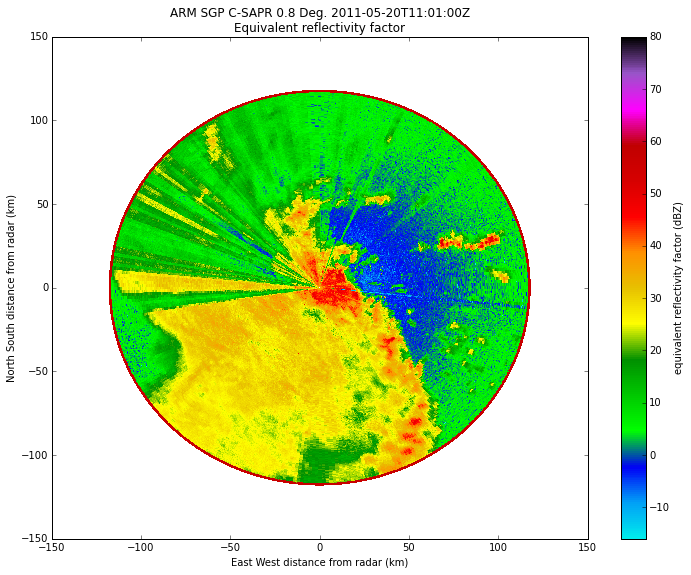

In [3]:
display = pyart.graph.RadarDisplay(radar)
display.plot('reflectivity', vmin=-16, vmax=80, cmap='pyart_NWSRef')

---
Similarly a Sigmet/IRIS file from the ARM XSAPR radar in the SGP can be read.

In [4]:
radar = pyart.io.read_sigmet('data/XSW110520113537.RAW7HHL')

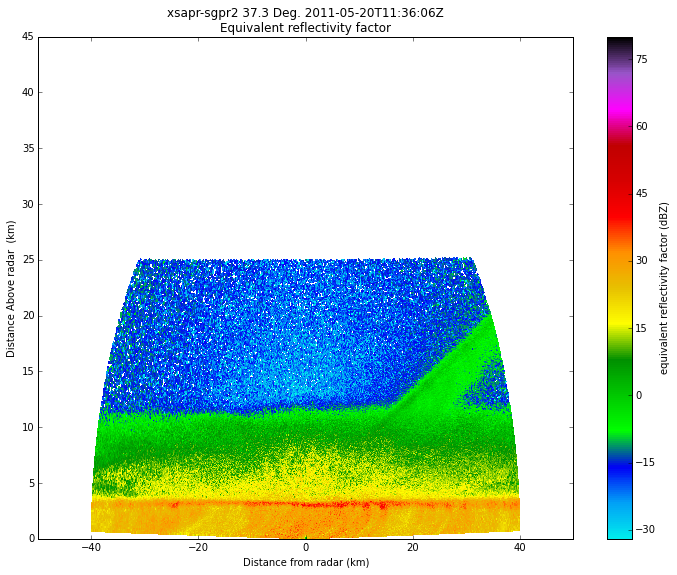

In [5]:
display = pyart.graph.RadarDisplay(radar)
display.plot('reflectivity', vmin=-32, vmax=80, cmap='pyart_NWSRef')

---
And the same for a NEXRAD Level 2 file from the radar in Upton, NY.  Notice that the file is compressed using GZip.  Py-ART will uncompress file transparently during the read.

In [6]:
radar = pyart.io.read_nexrad_archive('data/KOKX20110828_072107_V03.gz')

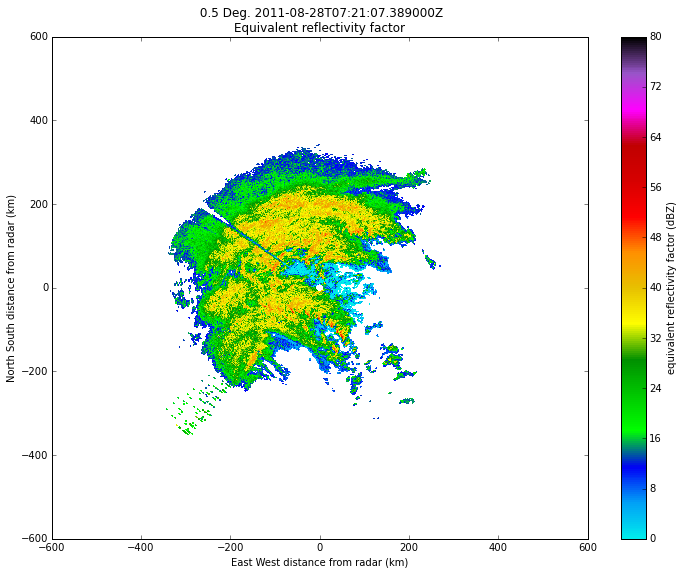

In [7]:
display = pyart.graph.RadarDisplay(radar)
display.plot('reflectivity', vmin=0, vmax=80, cmap='pyart_NWSRef')

---
Py-ART has partial support for reading files from ARM's KAZR radar.  Since the support is partial use the function in the pyart.aux_io namespace.

In [8]:
radar = pyart.aux_io.read_kazr('data/sgpkazrhiC1.a1.20110503.000001.cdf')

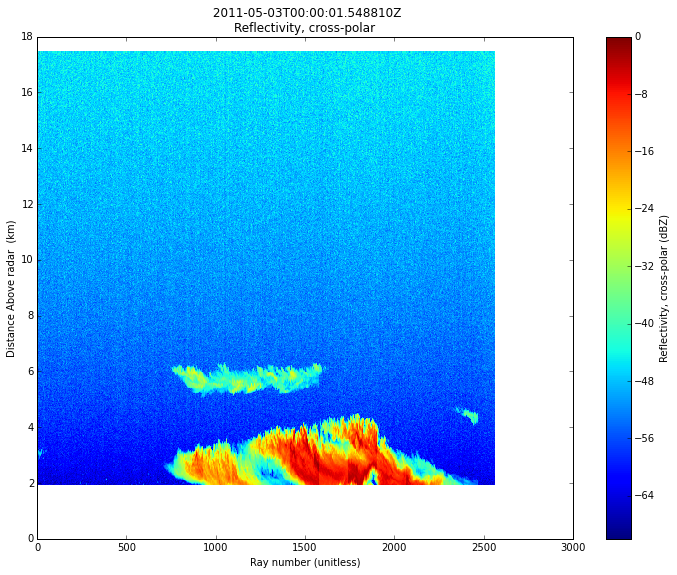

In [9]:
display = pyart.graph.RadarDisplay(radar)
display.plot('reflectivity_xpol', vmin=-70, vmax=0)

---
Remembering to use the correct `pyart.io.read_filetype` function for the file you are reading can be hard, so Py-ART provides the [`pyart.io.read`](http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.io.read.html#pyart.io.read) function that will examine the file, guess the type and call the correct read function.  

In [10]:
radar = pyart.io.read('data/110635.mdv')
# try the pyart.io.read function with othe other files used thus far..

The `read` function will not read data from file which Py-ART only partially supports.  To read these files you **must** use the `pyart.aux_io.read_filetype` functions.

All of these read functions return a **Radar** instance, which will be discussed in detail in the next notebook.  

As we saw in the last notebook the `info` method of the **Radar** class can provide details on the data stored in the object.

In [11]:
radar.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	units: meters
	long_name: Altitude
	standard_name: Altitude
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float64 and shape: (6120,)>
	comment: Azimuth of antenna relative to true north
	long_name: azimuth_angle_from_true_north
	standard_name: beam_azimuth_angle
	units: degrees
	axis: radial_azimuth_coordinate
elevation:
	data: <ndarray of type: float64 and shape: (6120,)>
	comment: Elevation of antenna relative to the horizontal plane
	long_name: elevation_angle_from_horizontal_plane
	standard_name: beam_elevation_angle
	units: degrees
	axis: radial_elevation_coordinate
fields:
	differential_phase:
		data: <ndarray of type: float32 and shape: (6120, 983)>
		long_name: Differential phase (PhiDP)
		valid_min: -180.0
		_FillValue: -9999.0
		units: degrees
		valid_max: 180.0
		standard_name: differential_phase_hv
		coordinates: elevation azimuth range
	cross_correlation_ratio:
		data

This feature is very useful to quickly detemine what data is contained in a file.  For this reason the command line  program, **radar_info**, will also provide this information.

In [12]:
# ! indicate that a command will be execute from a shell not Juypter
# The results are printed here. 
!radar_info -s data/110635.mdv

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	units: meters
	long_name: Altitude
	standard_name: Altitude
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float64 and shape: (6120,)>
	comment: Azimuth of antenna relative to true north
	long_name: azimuth_angle_from_true_north
	standard_name: beam_azimuth_angle
	units: degrees
	axis: radial_azimuth_coordinate
elevation:
	data: <ndarray of type: float64 and shape: (6120,)>
	comment: Elevation of antenna relative to the horizontal plane
	long_name: elevation_angle_from_horizontal_plane
	standard_name: beam_elevation_angle
	units: degrees
	axis: radial_elevation_coordinate
fields:
	differential_phase:
		data: <ndarray of type: float32 and shape: (6120, 983)>
		long_name: Differential phase (PhiDP)
		valid_min: -180.0
		_FillValue: -9999.0
		units: degrees
		valid_max: 180.0
		standard_name: differential_phase_hv
		coordinates: elevation azimuth range
	cross_correlation_ratio:
		data

---
## Advanced reading with Py-ART

Optional arguments provided to the `read` function allow control over what and how data is read from the file.  Details on these parameters are outline the the documenation of the [pyart.io.read](http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.io.read.html#pyart.io.read) function.

A text version of this documenation can be access in Jupyter by addding a '?' to the function

In [13]:
pyart.io.read?

---
### Controlling how Py-ART determines field names.

Many of the parameters of this function control how the fields are named. By default Py-ART uses settings in a configuration file to map between the fields in the raw file and a standard set of names.  This can be controlled at many levels.

The _file_field_names_ parameter is useful to completely disable this mapping.

In [14]:
radar = pyart.io.read('data/XSW110520113537.RAW7HHL', file_field_names=False)
for field_name in radar.fields.keys():
    print field_name

radar_echo_classification
corrected_reflectivity
differential_phase
cross_correlation_ratio
normalized_coherent_power
spectrum_width
total_power
reflectivity
differential_reflectivity
specific_differential_phase
velocity
corrected_differential_reflectivity


In [15]:
radar = pyart.io.read('data/XSW110520113537.RAW7HHL', file_field_names=True)
for field_name in radar.fields.keys():
    print field_name

ZDRC2
SQI2
DBZ2
WIDTH2
KDP2
DBT2
RHOHV2
DBZC2
ZDR2
HCLASS2
PHIDP2
VEL2


---
The _field_names_ parameter can be used to provide a custom mapping from the fields in the file to custom field names. 

In [16]:
custom_mapping = {
    'DBZ2': 'refl',
    'VEL2': 'vel',
    'WIDTH2': 'width',
    'SQI2': 'sqi',
    'PHIDP2': None,
}

radar = pyart.io.read('data/XSW110520113537.RAW7HHL', field_names=custom_mapping)
for field_name in radar.fields.keys():
    print field_name

width
sqi
vel
refl


To override the default name mappings and other configuartion options for an entire session use the [pyart.load_config](http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.load_config.html#pyart.load_config) function at the top of a Python script/session.  Setting the **PYART_CONFIG** environmental variable to a configuration file will load this configuration everytime Py-ART is imported.

---
The _exclude_fields_ parameter will prevent the specified fields from being read.

In [17]:
radar = pyart.io.read('data/XSW110520113537.RAW7HHL')
for field_name in radar.fields.keys():
    print field_name

radar_echo_classification
corrected_reflectivity
differential_phase
cross_correlation_ratio
normalized_coherent_power
spectrum_width
total_power
reflectivity
differential_reflectivity
specific_differential_phase
velocity
corrected_differential_reflectivity


In [18]:
radar = pyart.io.read('data/XSW110520113537.RAW7HHL', 
                      exclude_fields=['normalized_coherent_power'])
for field_name in radar.fields.keys():
    print field_name

radar_echo_classification
corrected_reflectivity
differential_phase
cross_correlation_ratio
spectrum_width
total_power
reflectivity
differential_reflectivity
specific_differential_phase
velocity
corrected_differential_reflectivity


In [19]:
custom_mapping = {
    'DBZ2': 'refl',
    'VEL2': 'vel',
    'WIDTH2': 'width',
    'SQI2': 'sqi',
    'PHIDP2': None,
}

radar = pyart.io.read('data/XSW110520113537.RAW7HHL', 
                      field_names=custom_mapping, exclude_fields=['sqi'])
for field_name in radar.fields.keys():
    print field_name

width
vel
refl


---
Setting the _delay_field_loading_ argument to `True` will delay the loading of all field data from the file.  For certain file formats this can significantly reduce memory usage and the time required to read a file.  Not all formats support this parameter and will issue a warning.

In [20]:
radar = pyart.io.read('data/sgpwsacrcwrhiC1.a1.20120820.204016.nc', delay_field_loading=True)

In [21]:
radar = pyart.io.read('data/XSW110520113537.RAW7HHL', delay_field_loading=True)

/Users/jhelmus/anaconda/envs/ams_course/lib/python2.7/site-packages/pyart/io/common.py:106: UserWarning: Unexpected arguments: ['delay_field_loading']
  warnings.warn('Unexpected arguments: %s' % dic.keys())


## Writing out files

Py-ART can write out as NetCDF files which follow the Cf/Radial convention using the [`pyart.io.write_cfradial`](http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.io.write_cfradial.html#pyart.io.write_cfradial) function.

In [22]:
radar = pyart.io.read('data/XSW110520113537.RAW7HHL')

In [23]:
pyart.io.write_cfradial('converted_sigmet_file.nc', radar)

In [24]:
!ncdump -h converted_sigmet_file.nc

netcdf converted_sigmet_file {
dimensions:
	time = UNLIMITED ; // (4278 currently)
	range = 534 ;
	sweep = 6 ;
	string_length = 32 ;
variables:
	double time(time) ;
		time:long_name = "time_in_seconds_since_volume_start" ;
		time:units = "seconds since 2011-05-20T11:35:37Z" ;
		time:comment = "Coordinate variable for time. Time at the center of each ray, in fractional seconds since the global variable time_coverage_start" ;
		time:standard_name = "time" ;
		time:calendar = "gregorian" ;
	float range(range) ;
		range:long_name = "range_to_measurement_volume" ;
		range:units = "meters" ;
		range:comment = "Coordinate variable for range. Range to center of each bin." ;
		range:standard_name = "projection_range_coordinate" ;
		range:meters_to_center_of_first_gate = 0.f ;
		range:meters_between_gates = 75.f ;
		range:spacing_is_constant = "true" ;
		range:axis = "radial_range_coordinate" ;
	float azimuth(time) ;
		azimuth:long_name = "azimuth_angle_from_true_north" ;
		azimuth:units = "degr

---
A command line tool to perform this conversion is also included with Py-ART.

In [25]:
!anytocfradial data/110635.mdv converted_mdv_file.nc

In [26]:
!ncdump -h converted_mdv_file.nc

netcdf converted_mdv_file {
dimensions:
	time = UNLIMITED ; // (6120 currently)
	range = 983 ;
	sweep = 17 ;
	string_length = 32 ;
variables:
	double time(time) ;
		time:long_name = "time_in_seconds_since_volume_start" ;
		time:units = "seconds since 2011-05-20T11:01:00Z" ;
		time:comment = "Coordinate variable for time. Time at the center of each ray, in fractional seconds since the global variable time_coverage_start" ;
		time:standard_name = "time" ;
		time:calendar = "gregorian" ;
	float range(range) ;
		range:long_name = "range_to_measurement_volume" ;
		range:units = "meters" ;
		range:comment = "Coordinate variable for range. Range to center of each bin." ;
		range:standard_name = "projection_range_coordinate" ;
		range:meters_to_center_of_first_gate = 117.8784f ;
		range:meters_between_gates = 119.917f ;
		range:spacing_is_constant = "true" ;
		range:axis = "radial_range_coordinate" ;
	double azimuth(time) ;
		azimuth:long_name = "azimuth_angle_from_true_north" ;
		azimuth:unit